# IMPORT DATA FROM DATASET 

In [4]:
# import pandas as pd

df = pd.read_csv("C:\\Users\\sahud\\Downloads\\archive\\country_wise_latest.csv")


# DISPLAY THE DATA

In [5]:
# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

# Data Cleaning

In [6]:
# Fill missing values with 0
df.fillna(0, inplace=True)


# Data Analysis

In [7]:
# Group by Country/Region
country_data = df.groupby('Country/Region').sum()

# Calculate totals
total_confirmed = country_data['Confirmed'].sum()
total_deaths = country_data['Deaths'].sum()
total_recovered = country_data['Recovered'].sum()

print(f'Total Confirmed: {total_confirmed}, Total Deaths: {total_deaths}, Total Recovered: {total_recovered}')


Total Confirmed: 16480485, Total Deaths: 654036, Total Recovered: 9468087


# Top 10 countries by confirmed cases

In [8]:
top_countries = country_data.sort_values(by='Confirmed', ascending=False).head(10)
print(top_countries[['Confirmed', 'Deaths', 'Recovered']])


                Confirmed  Deaths  Recovered
Country/Region                              
US                4290259  148011    1325804
Brazil            2442375   87618    1846641
India             1480073   33408     951166
Russia             816680   13334     602249
South Africa       452529    7067     274925
Mexico             395489   44022     303810
Peru               389717   18418     272547
Chile              347923    9187     319954
United Kingdom     301708   45844       1437
Iran               293606   15912     255144


# Bar chart for the top 10 countries by confirmed cases

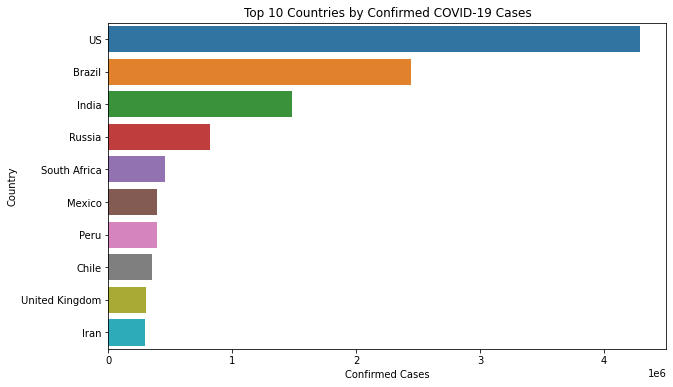

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries['Confirmed'], y=top_countries.index)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()


# Pie chart for the distribution of cases by WHO region

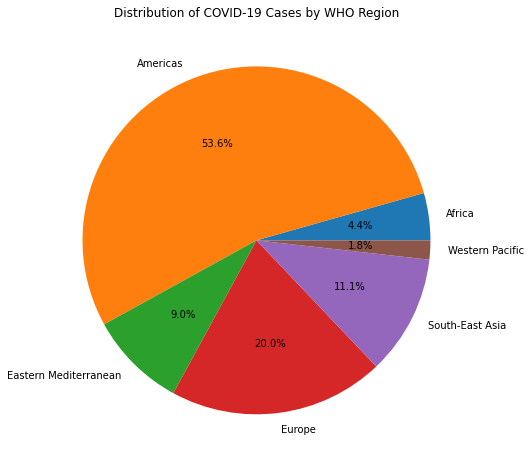

In [18]:
# Group by WHO Region
region_data = df.groupby('WHO Region').sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_data['Confirmed'], labels=region_data.index, autopct='%1.1f%%')
plt.title('Distribution of COVID-19 Cases by WHO Region')
plt.show()


# Trend Analysis

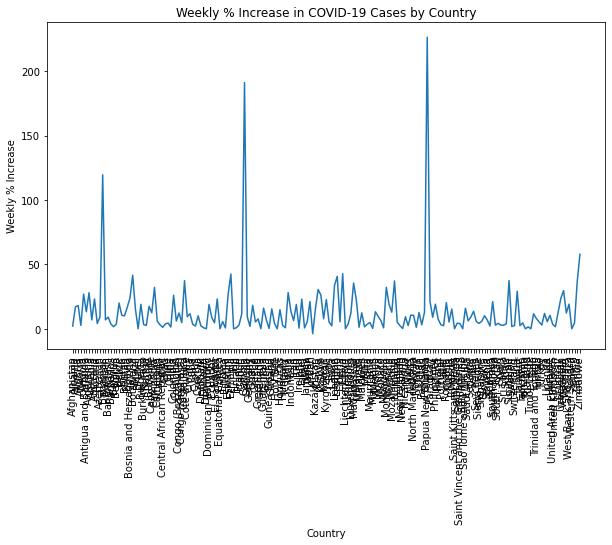

In [19]:
# Line plot for weekly change
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Country/Region'], y=df['1 week % increase'])
plt.title('Weekly % Increase in COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Weekly % Increase')
plt.xticks(rotation=90)
plt.show()


# Total and Average New Cases, New Deaths, and New Recovered

In [10]:
# Total values
total_new_cases = df['New cases'].sum()
total_new_deaths = df['New deaths'].sum()
total_new_recovered = df['New recovered'].sum()

print(f"Total New Cases: {total_new_cases}, Total New Deaths: {total_new_deaths}, Total New Recovered: {total_new_recovered}")

# Average values
average_new_cases = df['New cases'].mean()
average_new_deaths = df['New deaths'].mean()
average_new_recovered = df['New recovered'].mean()

print(f"Average New Cases: {average_new_cases}, Average New Deaths: {average_new_deaths}, Average New Recovered: {average_new_recovered}")


Total New Cases: 228693, Total New Deaths: 5415, Total New Recovered: 174623
Average New Cases: 1222.957219251337, Average New Deaths: 28.9572192513369, Average New Recovered: 933.812834224599


# Top 10 Countries with the Most New Cases, Deaths, and Recoveries

In [11]:
# Top 10 countries with the most new cases
top_new_cases = df[['Country/Region', 'New cases']].sort_values(by='New cases', ascending=False).head(10)
print("Top 10 Countries by New Cases:")
print(top_new_cases)

# Top 10 countries with the most new deaths
top_new_deaths = df[['Country/Region', 'New deaths']].sort_values(by='New deaths', ascending=False).head(10)
print("Top 10 Countries by New Deaths:")
print(top_new_deaths)

# Top 10 countries with the most new recoveries
top_new_recovered = df[['Country/Region', 'New recovered']].sort_values(by='New recovered', ascending=False).head(10)
print("Top 10 Countries by New Recovered:")
print(top_new_recovered)


Top 10 Countries by New Cases:
    Country/Region  New cases
173             US      56336
79           India      44457
23          Brazil      23284
37        Colombia      16306
132           Peru      13756
154   South Africa       7096
138         Russia       5607
111         Mexico       4973
6        Argentina       4890
13      Bangladesh       2772
Top 10 Countries by New Deaths:
    Country/Region  New deaths
173             US        1076
79           India         637
23          Brazil         614
132           Peru         575
37        Colombia         508
111         Mexico         342
154   South Africa         298
81            Iran         212
6        Argentina         120
82            Iraq          96
Top 10 Countries by New Recovered:
    Country/Region  New recovered
23          Brazil          33728
79           India          33598
173             US          27941
37        Colombia          11494
154   South Africa           9848
111         Mexico         

# Bar Chart for New Cases, New Deaths, and New Recovered

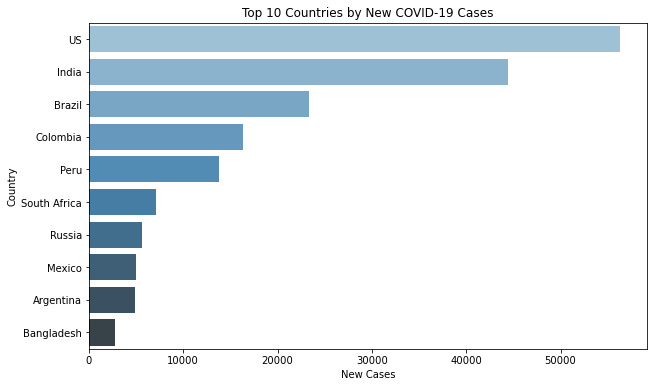

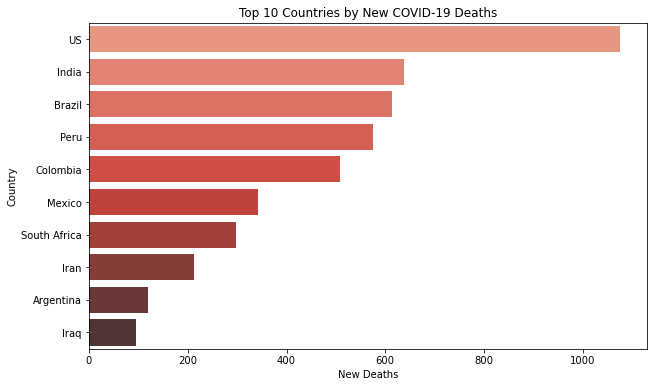

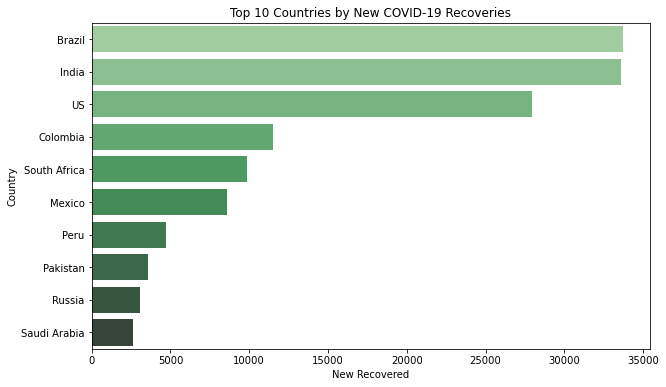

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting top 10 countries by new cases
plt.figure(figsize=(10, 6))
sns.barplot(x=top_new_cases['New cases'], y=top_new_cases['Country/Region'], palette="Blues_d")
plt.title('Top 10 Countries by New COVID-19 Cases')
plt.xlabel('New Cases')
plt.ylabel('Country')
plt.show()

# Plotting top 10 countries by new deaths
plt.figure(figsize=(10, 6))
sns.barplot(x=top_new_deaths['New deaths'], y=top_new_deaths['Country/Region'], palette="Reds_d")
plt.title('Top 10 Countries by New COVID-19 Deaths')
plt.xlabel('New Deaths')
plt.ylabel('Country')
plt.show()

# Plotting top 10 countries by new recoveries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_new_recovered['New recovered'], y=top_new_recovered['Country/Region'], palette="Greens_d")
plt.title('Top 10 Countries by New COVID-19 Recoveries')
plt.xlabel('New Recovered')
plt.ylabel('Country')
plt.show()


# Calculate Total Deaths for Each Country

In [15]:
# Calculate total deaths (Deaths + New deaths)
df['Total Deaths'] = df['Deaths'] + df['New deaths']

# Display all rows with Country/Region and Total Deaths
print(df[['Country/Region', 'Deaths', 'New deaths', 'Total Deaths']])


         Country/Region  Deaths  New deaths  Total Deaths
0           Afghanistan    1269          10          1279
1               Albania     144           6           150
2               Algeria    1163           8          1171
3               Andorra      52           0            52
4                Angola      41           1            42
..                  ...     ...         ...           ...
182  West Bank and Gaza      78           2            80
183      Western Sahara       1           0             1
184               Yemen     483           4           487
185              Zambia     140           1           141
186            Zimbabwe      36           2            38

[187 rows x 4 columns]


# TOP 10 HIGHEST DEATH COUNTY 

In [16]:
# Calculate total deaths (Deaths + New deaths)
df['Total Deaths'] = df['Deaths'] + df['New deaths']

# Sort the DataFrame by Total Deaths in descending order
df_sorted = df.sort_values(by='Total Deaths', ascending=False)

# Display the top 10 countries with the highest total deaths
top_10_deaths = df_sorted[['Country/Region', 'Deaths', 'New deaths', 'Total Deaths']].head(10)
print(top_10_deaths)


     Country/Region  Deaths  New deaths  Total Deaths
173              US  148011        1076        149087
23           Brazil   87618         614         88232
177  United Kingdom   45844           7         45851
111          Mexico   44022         342         44364
85            Italy   35112           5         35117
79            India   33408         637         34045
61           France   30212          17         30229
157           Spain   28432           0         28432
132            Peru   18418         575         18993
81             Iran   15912         212         16124


# Visualize the Total Deaths by Country

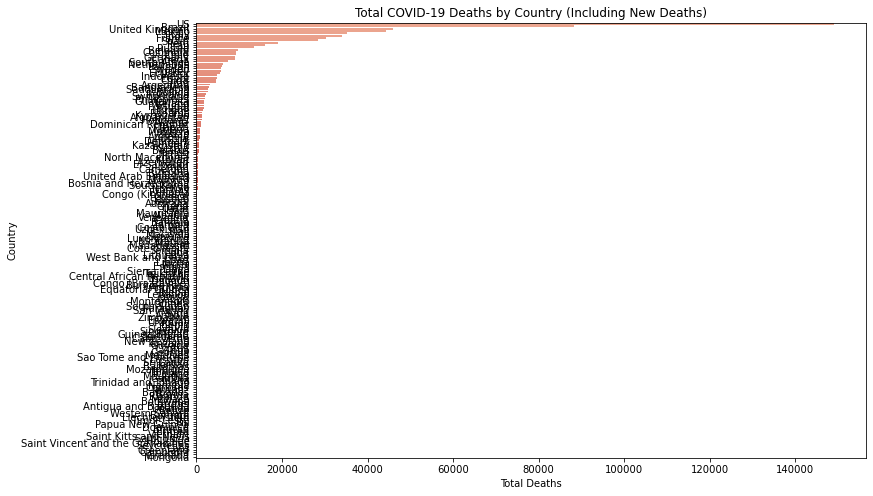

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by Total Deaths in descending order
df_sorted = df.sort_values(by='Total Deaths', ascending=False)

# Plotting total deaths by country
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Deaths', y='Country/Region', data=df_sorted, palette="Reds_d")
plt.title('Total COVID-19 Deaths by Country (Including New Deaths)')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()


# Analyzing Specific Countries

In [24]:
# Example: Filter data for specific countries
countries_of_interest = ['India', 'Brazil']
filtered_data = df[df['Country/Region'].isin(countries_of_interest)]

print(filtered_data[['Country/Region', 'Deaths', 'New deaths', 'Total Deaths']])


   Country/Region  Deaths  New deaths  Total Deaths
23         Brazil   87618         614         88232
79          India   33408         637         34045


In [32]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
from jupyter_dash import JupyterDash  # Use JupyterDash



# Calculate total deaths (Deaths + New deaths)
df['Total Deaths'] = df['Deaths'] + df['New deaths']

# Create the Dash app using JupyterDash
app = JupyterDash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("COVID-19 Dashboard", style={'text-align': 'center'}),

    dcc.Dropdown(id="country-dropdown",
                 options=[{'label': country, 'value': country} for country in df['Country/Region'].unique()],
                 multi=False,
                 value='World',
                 style={'width': "40%"}),

    html.Div(id='output_container', children=[]),
    html.Br(),

    dcc.Graph(id='total-deaths-bar', figure={}),
    dcc.Graph(id='new-cases-bar', figure={}),
])

@app.callback(
    [dash.dependencies.Output(component_id='output_container', component_property='children'),
     dash.dependencies.Output(component_id='total-deaths-bar', component_property='figure'),
     dash.dependencies.Output(component_id='new-cases-bar', component_property='figure')],
    [dash.dependencies.Input(component_id='country-dropdown', component_property='value')]
)
def update_graph(selected_country):
    if selected_country == "World":
        dff = df
    else:
        dff = df[df['Country/Region'] == selected_country]

    container = f"Showing details for: {selected_country}"

    total_deaths_fig = px.bar(
        dff.sort_values(by='Total Deaths', ascending=False).head(10),
        x='Country/Region',
        y='Total Deaths',
        title="Top 10 Countries by Total Deaths"
    )

    new_cases_fig = px.bar(
        dff,
        x='Country/Region',
        y=['New cases', 'New deaths', 'New recovered'],
        title=f"New Cases, Deaths, and Recovered in {selected_country}"
    )

    return container, total_deaths_fig, new_cases_fig

# Run the app in Jupyter Notebook
app.run_server(mode='inline', debug=True)


In [48]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
from jupyter_dash import JupyterDash  # Use JupyterDash for Jupyter Notebooks


# Calculate total deaths (Deaths + New deaths)
df['Total Deaths'] = df['Deaths'] + df['New deaths']

# Create the Dash app
app = JupyterDash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("COVID-19 Advanced Dashboard", style={'text-align': 'center', 'color': '#1f77b4'}),

    html.Div([
        dcc.Dropdown(
            id="country-dropdown",
            options=[{'label': country, 'value': country} for country in df['Country/Region'].unique()],
            multi=False,
            value='World',
            style={'width': "60%", 'margin': '0 auto'}
        ),
    ], style={'text-align': 'center'}),

    html.Div(id='output_container', style={'text-align': 'center', 'font-size': '20px'}),
    html.Br(),

    dcc.Graph(id='map', style={'height': '70vh'}),
    dcc.Graph(id='total-deaths-bar', style={'height': '40vh'}),
    dcc.Graph(id='new-cases-bar', style={'height': '40vh'}),
])

# Callback to update the graphs based on the selected country
@app.callback(
    [dash.dependencies.Output(component_id='output_container', component_property='children'),
     dash.dependencies.Output(component_id='map', component_property='figure'),
     dash.dependencies.Output(component_id='total-deaths-bar', component_property='figure'),
     dash.dependencies.Output(component_id='new-cases-bar', component_property='figure')],
    [dash.dependencies.Input(component_id='country-dropdown', component_property='value')]
)
def update_graph(selected_country):
    if selected_country == "World":
        dff = df
        container = "Showing global data"

        # Globe map with animation
        map_fig = px.scatter_geo(
            df,
            locations="Country/Region",
            locationmode="country names",
            size="Total Deaths",
            color="Total Deaths",
            hover_name="Country/Region",
            title="Global COVID-19 Deaths",
            projection="orthographic",
            color_continuous_scale=px.colors.sequential.Viridis,
            size_max=100
        )
        map_fig.update_geos(
            showcoastlines=True,
            coastlinecolor="Black",
            showland=True,
            landcolor="white",
            showocean=True,
            oceancolor="LightBlue"
        )
        map_fig.update_layout(title={'x':0.5, 'xanchor': 'center'})

    else:
        dff = df[df['Country/Region'] == selected_country]
        container = f"Showing details for: {selected_country}"

        # Country-specific map
        map_fig = px.choropleth(
            df,
            locations="Country/Region",
            locationmode="country names",
            color="Total Deaths",
            hover_name="Country/Region",
            title=f"{selected_country} COVID-19 Data",
            color_continuous_scale=px.colors.sequential.Viridis
        )
        map_fig.update_geos(
            showcoastlines=True,
            coastlinecolor="Black",
            showland=True,
            landcolor="white",
            showocean=True,
            oceancolor="LightBlue"
        )
        map_fig.update_layout(title={'x':0.5, 'xanchor': 'center'})

    # Bar chart for Total Deaths
    total_deaths_fig = px.bar(
        dff.sort_values(by='Total Deaths', ascending=False).head(10),
        x='Country/Region',
        y='Total Deaths',
        title="Top 10 Countries by Total Deaths",
        color='Total Deaths',
        color_continuous_scale=px.colors.sequential.Viridis
    )
    total_deaths_fig.update_layout(title={'x':0.5, 'xanchor': 'center'})

    # Bar chart for New Cases, New Deaths, New Recovered
    new_cases_fig = px.bar(
        dff,
        x='Country/Region',
        y=['New cases', 'New deaths', 'New recovered'],
        title=f"New Cases, Deaths, and Recovered in {selected_country}",
        barmode='group',
        color_discrete_sequence=px.colors.qualitative.Plotly
    )
    new_cases_fig.update_layout(title={'x':0.5, 'xanchor': 'center'})

    return container, map_fig, total_deaths_fig, new_cases_fig

# Run the app in Jupyter Notebook
app.run_server(mode='inline', debug=True)


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sahud\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\sahud\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\sahud\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\sahud\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "C:\Users\sahud\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\sahud\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\sahud\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\sahud\anaconda3\

   ---------------------------------------- 6.9/6.9 MB 59.6 kB/s eta 0:00:00
                                            0.8/50.1 MB 15.1 kB/s eta 0:54:30
